# ML Assignment 8

**1) Implement Perceptron training algorithms for**
- AND gate
- OR gate
- NAND gate
- NOR gate

**2) How will you verify your trained algorithms? Justify your solution.**

------

The basic shape of the Perceptorn is as follows

<img src="https://user-images.githubusercontent.com/66634743/96351974-a3116400-10d0-11eb-8649-3b4e8813ecc3.png" align="left">

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

------

### Importing the Required hearder

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

### Initializing Data

In [2]:
# common for all the gates
data = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

# specific to the gates
Y_train_AND = np.array([[0], [0], [0], [1]])
Y_train_OR = np.array([[0], [1], [1], [1]])
Y_train_NAND = np.array([[1], [1], [1], [0]])
Y_train_NOR = np.array([[1], [0], [0], [0]])

### Functions

In [131]:
def sigmoid(z):
    z = np.array(z)
    
    return (1/ (1 + np.exp(-z)))

def ANN(data, Y_train, epochs):
    w = np.random.rand(3)
    history = []
    
    for i in range(epochs):
        n = random.randint(0,3)
        x = data[n]
        
        H = np.dot(w, x)
        J = Y_train[n] - sigmoid(H)
        w += J*x
        
        history.append(J)
        
    return w, history

def predict(x):
    return int(x > 0.5)

### Model Testing

In [141]:
Y = [Y_train_AND, Y_train_OR, Y_train_NAND, Y_train_NOR]
operations = ['AND', 'OR', 'NAND', 'NOR']
histories = []
epochs = 1000

for i in range(4):
    print("\n--------------------------------------------")
    print("\t\t", operations[i], "Gate")
    print("--------------------------------------------")
    w, history = ANN(data, Y[i], epochs)
    histories.append(history)
    print("W = ", w, '\n')
    for x in data:
        H = sigmoid(np.dot(x, w))
        print(x[1], operations[i], x[2], "=", round(H, 6), "( ~", predict(H), ")")
#     print("\n---------------------------------------\n")


--------------------------------------------
		 AND Gate
--------------------------------------------
W =  [-11.35131826   7.55370259   7.39318926] 

0 AND 0 = 1.2e-05 ( ~ 0 )
0 AND 1 = 0.018741 ( ~ 0 )
1 AND 0 = 0.021932 ( ~ 0 )
1 AND 1 = 0.973288 ( ~ 1 )

--------------------------------------------
		 OR Gate
--------------------------------------------
W =  [-3.92183047  8.68942422  8.58230373] 

0 OR 0 = 0.01942 ( ~ 0 )
0 OR 1 = 0.990627 ( ~ 1 )
1 OR 0 = 0.991571 ( ~ 1 )
1 OR 1 = 0.999998 ( ~ 1 )

--------------------------------------------
		 NAND Gate
--------------------------------------------
W =  [11.50707997 -7.2350748  -7.5725978 ] 

0 NAND 0 = 0.99999 ( ~ 1 )
0 NAND 1 = 0.980819 ( ~ 1 )
1 NAND 0 = 0.986238 ( ~ 1 )
1 NAND 1 = 0.035551 ( ~ 0 )

--------------------------------------------
		 NOR Gate
--------------------------------------------
W =  [ 4.00756585 -8.67066114 -8.74354578] 

0 NOR 0 = 0.982147 ( ~ 1 )
0 NOR 1 = 0.008698 ( ~ 0 )
1 NOR 0 = 0.009349 ( ~ 0 )
1 N

------
### Verifying the success of the model : 

#### There are many ways to verify the models success like :

**1) Check the final value**

**2) Error in the prediction** 

We can check the final result but to really hit the nail on the head we need to see the **Error in Prediction of the models** for their respective **W values**

### Plot of the Error vs the Epochs :

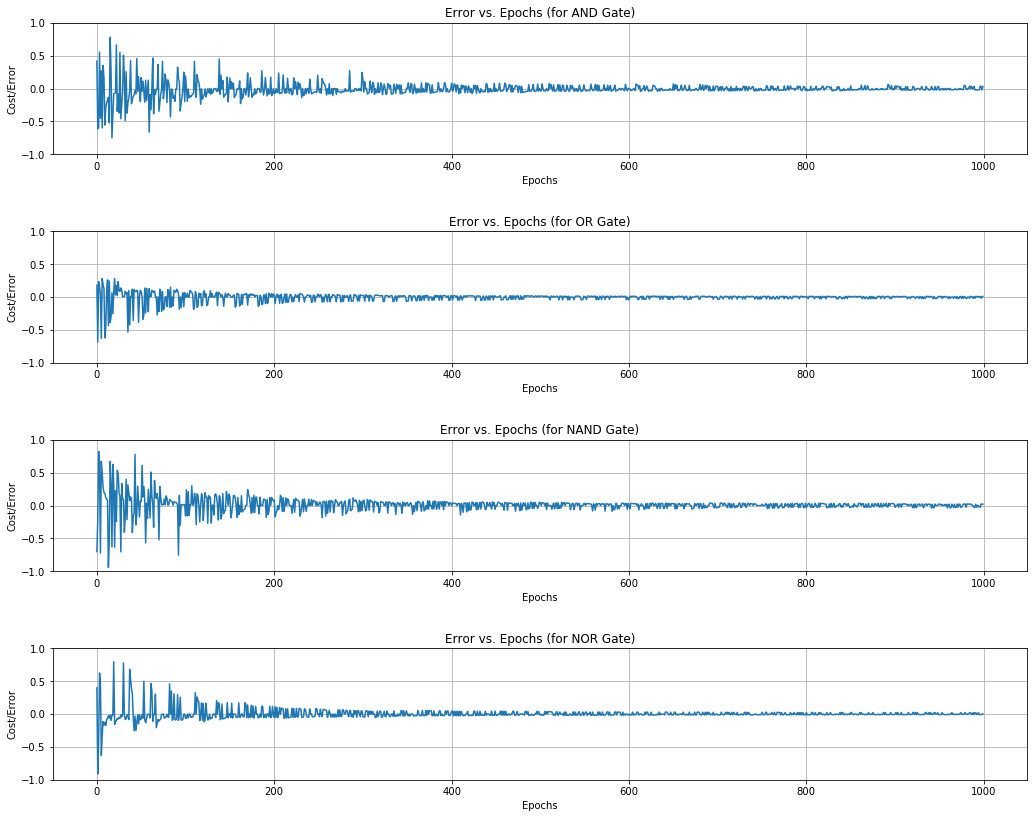

In [133]:
fig, axs = plt.subplots(4, 1, figsize=(15, 12))

for i in range(4):
    axs[i].grid(True)
    axs[i].set_title('Error vs. Epochs (for ' + operations[i] + ' Gate)')
    axs[i].plot(range(epochs), histories[i])
    axs[i].set_ylim([-1, 1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Cost/Error')
    
fig.tight_layout(pad=3.0)

#### *The model initially makes a lot of mistakes in the prediction of data but as we see that over time the error tends to 0.*